<a href="https://colab.research.google.com/github/vikas6169/Credit-card-default-prediction/blob/main/Copy_of_VK1_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

**INTRODUCTION**


The credit card companies in Taiwan faced a cash and debt crisis in 2005, with a peak in delinquency anticipated for the third quarter of 2006. (Chou). Taiwan's card-issuing banks overissued cash and credit cards to unauthorised applicants in an effort to gain market dominance. In addition, most cardholders, regardless of their capacity to pay back, abused their credit cards for consumption and racked up substantial cash and credit card debt. Consumer financial confidence was damaged by this crisis, which also provided major challenges for cardholders and banks.

**Table of Content :**




*   Data Wrangling
*   EDA part
    1. Data Visualisation
    2. Data Analysis



*   Analysis of correlation between features of the Dataset
*   Data Cleaning
    * Feature Scaling



*   Spiliting Dataset
*   Applying Machine Learning Algorithm
   *  Logistic Regression
   *  Grid Search on logistic regression

   *  Decision Tree
   *   Grid Search on decision tree

   *  Random Forest
   *   Grid Search on trandom forest

   *  Stochastic Gradient Descent
   *   Grid Search on SGD

   *  K-Nearest Neighbour
   *   Grid Search on KNN

   *  Support Vector Machine
   *   Grid Search on SVM




*   Conclusion



   








In [ ]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,10)})
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone3/default of credit card clients.xls - Data.csv')

**Data Wrangling**

1.   Data Wrangling is the process of gathering, collecting, and transforming Raw data into another format for better understanding, decision-making, accessing, and analysis in less time.
2.   Data Wrangling is also known as Data Munging.



In [ ]:
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
dataset.columns = dataset.iloc[0]
dataset.drop(labels=0, axis=0, inplace=True)

In [ ]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [ ]:
dataset.shape

(30000, 25)

In [ ]:
dataset.set_index('ID',inplace=True)

In [ ]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
dataset.isnull().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
dataset['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
y=dataset['SEX'].value_counts()

In [ ]:
dataset = dataset.rename(columns={'default payment next month': 'defaulter_payer', 
                        'PAY_0': 'PAY_1'})
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter_payer
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LIMIT_BAL        30000 non-null  object
 1   SEX              30000 non-null  object
 2   EDUCATION        30000 non-null  object
 3   MARRIAGE         30000 non-null  object
 4   AGE              30000 non-null  object
 5   PAY_1            30000 non-null  object
 6   PAY_2            30000 non-null  object
 7   PAY_3            30000 non-null  object
 8   PAY_4            30000 non-null  object
 9   PAY_5            30000 non-null  object
 10  PAY_6            30000 non-null  object
 11  BILL_AMT1        30000 non-null  object
 12  BILL_AMT2        30000 non-null  object
 13  BILL_AMT3        30000 non-null  object
 14  BILL_AMT4        30000 non-null  object
 15  BILL_AMT5        30000 non-null  object
 16  BILL_AMT6        30000 non-null  object
 17  PAY_AMT1         30000 non-null  obj

In [ ]:
dataset = dataset.astype({'LIMIT_BAL': 'float64', 'SEX': 'int64','EDUCATION':'int64','MARRIAGE':'int64','AGE':'int64',
                            'PAY_1':'int64','PAY_2':'int64','PAY_3':'int64','PAY_4':'int64','PAY_5':'int64','PAY_6':'int64',
                            'BILL_AMT1':'float64','BILL_AMT2':'float64','BILL_AMT3':'float64','BILL_AMT4':'float64','BILL_AMT5':'float64','BILL_AMT6':'float64',
                            'PAY_AMT1':'float64','PAY_AMT2':'float64','PAY_AMT3':'float64','PAY_AMT4':'float64','PAY_AMT5':'float64','PAY_AMT6':'float64','defaulter_payer':'int64'})

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LIMIT_BAL        30000 non-null  float64
 1   SEX              30000 non-null  int64  
 2   EDUCATION        30000 non-null  int64  
 3   MARRIAGE         30000 non-null  int64  
 4   AGE              30000 non-null  int64  
 5   PAY_1            30000 non-null  int64  
 6   PAY_2            30000 non-null  int64  
 7   PAY_3            30000 non-null  int64  
 8   PAY_4            30000 non-null  int64  
 9   PAY_5            30000 non-null  int64  
 10  PAY_6            30000 non-null  int64  
 11  BILL_AMT1        30000 non-null  float64
 12  BILL_AMT2        30000 non-null  float64
 13  BILL_AMT3        30000 non-null  float64
 14  BILL_AMT4        30000 non-null  float64
 15  BILL_AMT5        30000 non-null  float64
 16  BILL_AMT6        30000 non-null  float64
 17  PAY_AMT1         

In [ ]:
dataset.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter_payer
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**DATA VISUALISATION**

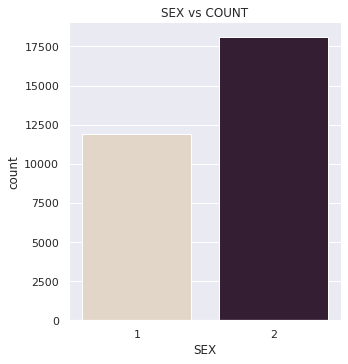

In [ ]:
sns.catplot(data=dataset, x='SEX', kind='count', palette='ch:.25').set(title='SEX vs COUNT')

From the above graph, we can conclude that female credit card holders are greater than the male credit card holders

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'SEX vs COUNT')

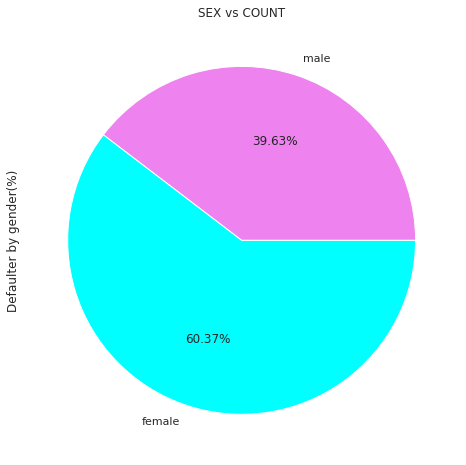

In [ ]:
labels = 'male','female'
dataset.groupby('SEX').size().plot(kind='pie', labels=labels, autopct='%.2f%%',colors=['violet','cyan'],figsize=(15,8))
plt.axes().set_ylabel('Defaulter by gender(%)')
plt.axes().set_title('SEX vs COUNT')

The above pie chart shows the percentage of male and female card holders.
We can conclude that 60.37 percent are female and 39.63 percent are male card holders


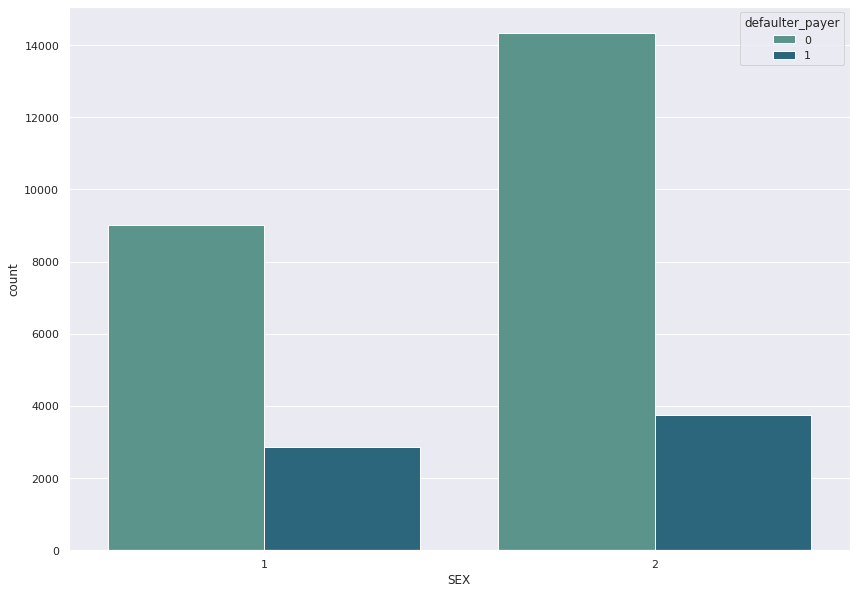

In [ ]:
sns.countplot(x='SEX', data=dataset, hue="defaulter_payer", palette="crest")

From the above graph, we can observe that females have overall less default payments than male.

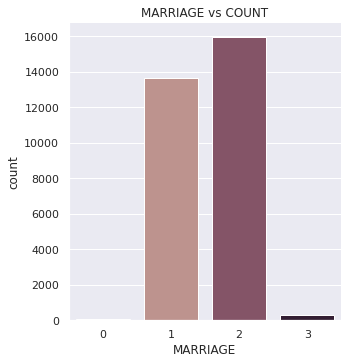

In [ ]:
sns.catplot(data=dataset, x='MARRIAGE', kind='count', palette='ch:.25').set(title='MARRIAGE vs COUNT')

In this graph, we can conclude that credit card holders who have marital status are single are high in number, then those who have marital status are married come at the second highest and then come others.

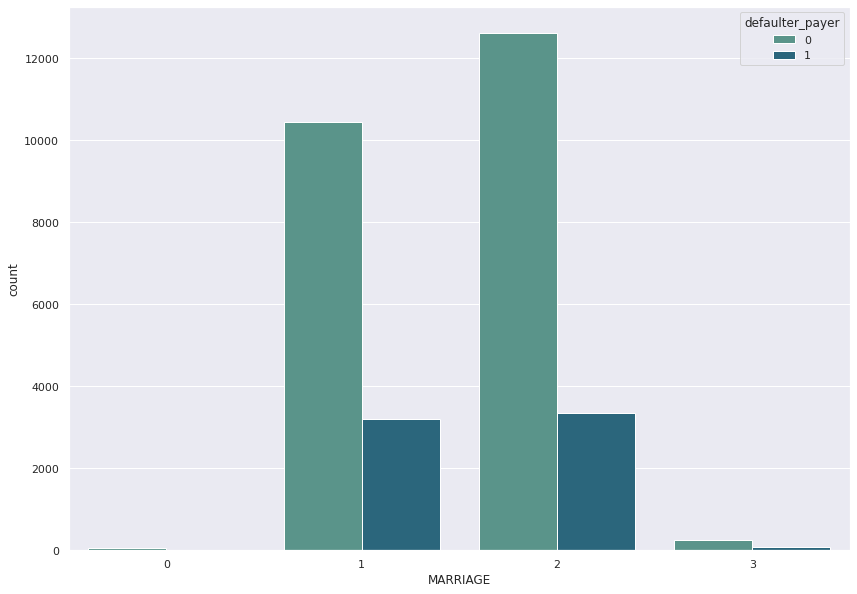

In [ ]:
sns.countplot(x="MARRIAGE", data=dataset,hue="defaulter_payer", palette="crest")

From the above graph we can say it is clear that those people who have marital status single have less default payment wrt married status people.

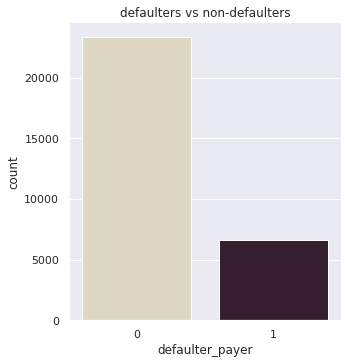

In [ ]:
sns.catplot(data=dataset, x='defaulter_payer', kind='count', palette='ch:.35').set(title='defaulters vs non-defaulters')

From the above graph, we can conclude that most of the credit card holders are non-defaulters. Around 6000  card holders come in the category of payment defaulters.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Percentage of defaulters vs non-defaulters')

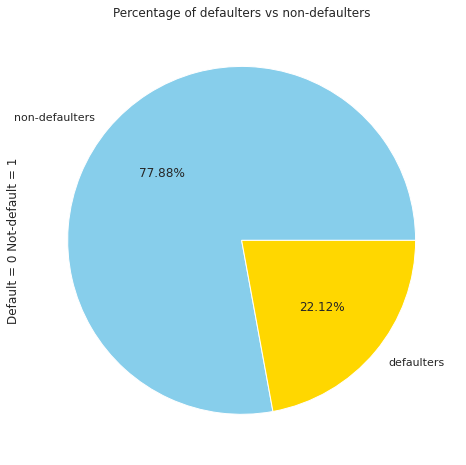

In [ ]:
labels = 'non-defaulters','defaulters'
dataset.groupby('defaulter_payer').size().plot(kind='pie', labels=labels, autopct='%.2f%%',colors=['skyblue','gold'],figsize=(15,8))
plt.axes().set_ylabel('Default = 0 Not-default = 1')
plt.axes().set_title('Percentage of defaulters vs non-defaulters')

*  In this graph, we can see the percentage of the defaulter and non defaulter credit card holders.

*   Here, non-defaulters are less than defaulters.Non-defaulters are 22.12% and defaulters are 77.88%.

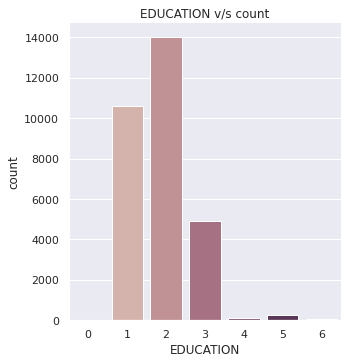

In [ ]:
sns.catplot(data=dataset, x='EDUCATION', kind='count', palette='ch:.15').set(title='EDUCATION v/s count')

In this graph, we can conclude that most of the credit cards holder is belongs to universities. Then comes graduate school and then high school. The last credit card holder comes for the category of 4,5, and 6.

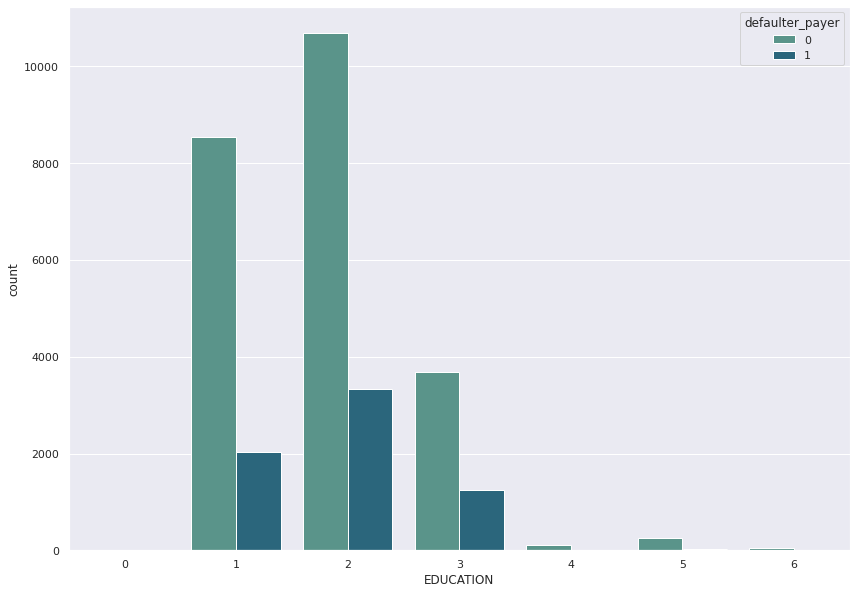

In [ ]:
sns.countplot(x="EDUCATION", data=dataset,hue="defaulter_payer", palette="crest")

*  In this graph, we can see that the university category has 15000 non defaulter credit card holders and around 3700 defaulters in payments.
*  For the graduate, the non defaulter payments are around 8400 and the defaulter payments are 1900.
*  For the category of high school, around 3800 are non defaulter and 1000 are defaulters.


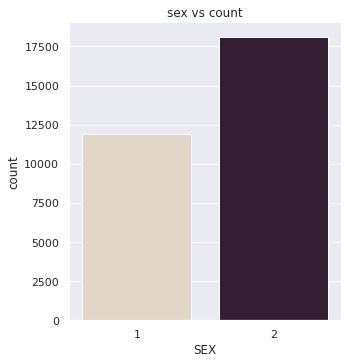

In [ ]:
sns.catplot(data=dataset, x='SEX', kind='count', palette='ch:.25').set(title='sex vs count')

In this graph, we can conclude that males are around 11000 credit card holders and around 16000 are female credit card holders.

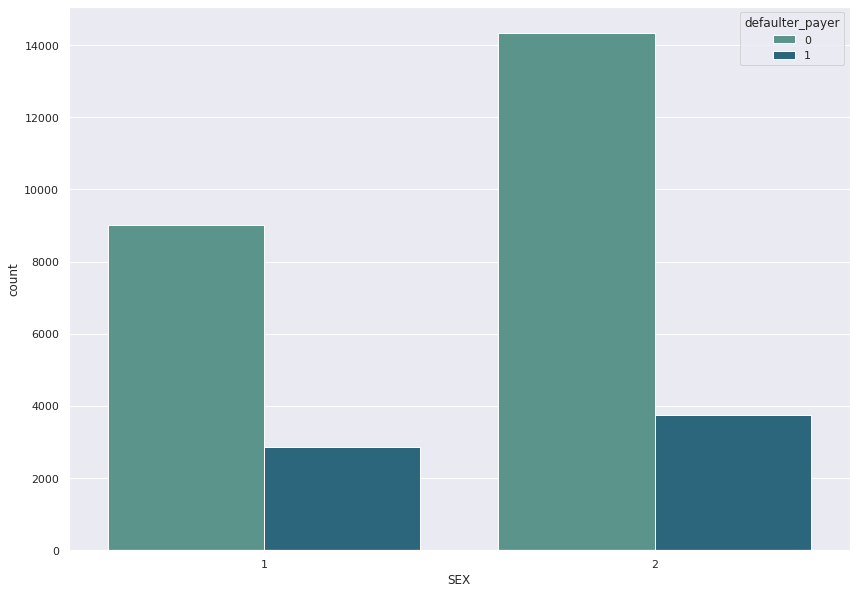

In [ ]:
sns.countplot(x="SEX", data=dataset,hue="defaulter_payer", palette="crest")

From the above graph, we can conclude, by the comaprison of both the male and female section that male section have more number of efaulters than females. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


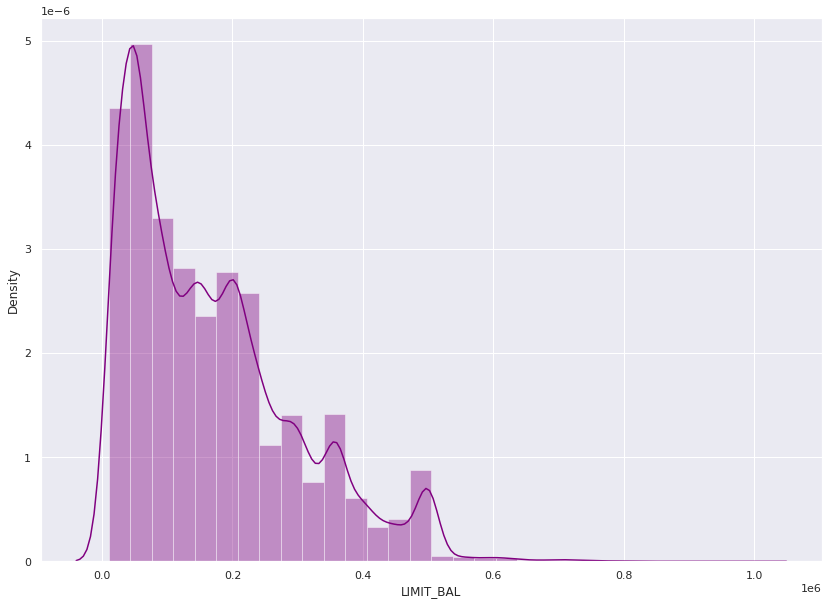

In [ ]:
sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=30,color='purple')

From the above density plot, it seems that people with higher credit limit have less in number then people having low credit limit.

**Sample the Data**

In [ ]:
sample_data = dataset.sample(n=6000,replace =False,random_state=1)

*  We have 30000 of rows so somtimes it takes huge amount of time for doing gridsearch cv. so, we sampled the dataset so that all features distribution are preserved. this is done mainly to speed up the computation.

*  We take a small sample here instead of running experiments, feature engineering, and training models on all the dataset.Typically, 10–20% sampled data from original dataset is enough.

*  Here we are taking 20% as a sample data from original dataset.

In [ ]:
sample_data.isnull().sum()

0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_1              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
defaulter_payer    0
dtype: int64

In [ ]:
sample_data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter_payer
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,168852.666667,1.601667,1.847667,1.551333,35.472167,-0.031833,-0.142333,-0.172000,-0.227333,-0.272500,...,44331.768500,41450.744333,39736.677167,5810.480500,6.148305e+03,5737.943833,5319.344833,5090.290167,5798.678667,0.222833
std,131178.075814,0.489596,0.790716,0.523524,9.264261,1.091491,1.177415,1.179964,1.157242,1.124331,...,66002.343287,61947.345034,60146.082254,16432.911186,2.776077e+04,18564.617195,17014.461456,15999.521584,20930.554528,0.416182
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-94625.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2650.000000,1785.500000,1206.000000,1000.000000,8.267500e+02,398.000000,315.750000,249.000000,157.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19348.000000,18475.500000,17485.500000,2100.000000,2.043000e+03,1900.000000,1533.000000,1507.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53684.750000,50802.250000,49508.500000,5009.250000,5.000000e+03,5000.000000,4235.750000,4255.750000,4010.250000,0.000000
max,750000.000000,2.000000,6.000000,3.000000,75.000000,7.000000,8.000000,8.000000,7.000000,7.000000,...,628699.000000,524315.000000,513798.000000,405016.000000,1.684259e+06,508229.000000,331788.000000,379267.000000,528666.000000,1.000000


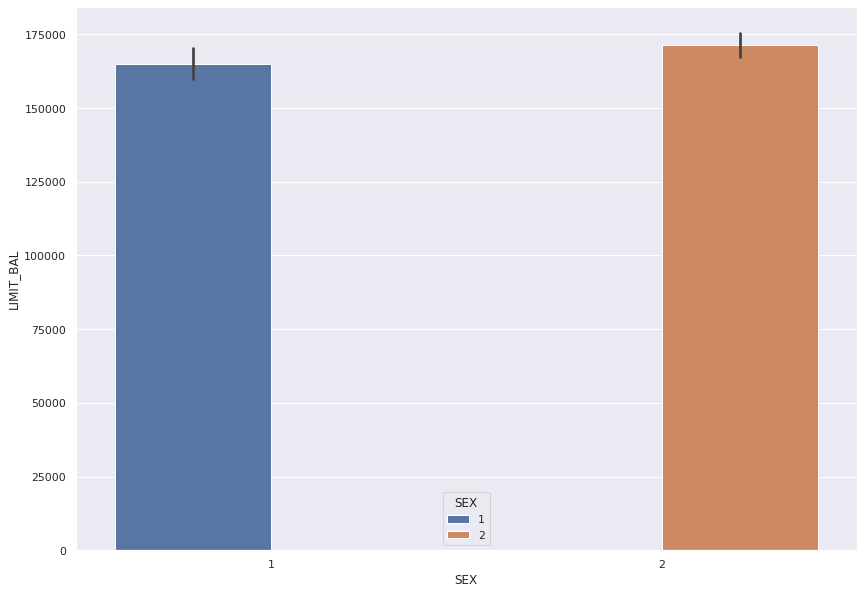

In [ ]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=sample_data,hue='SEX')

Here we can say females having more credit limit than male.

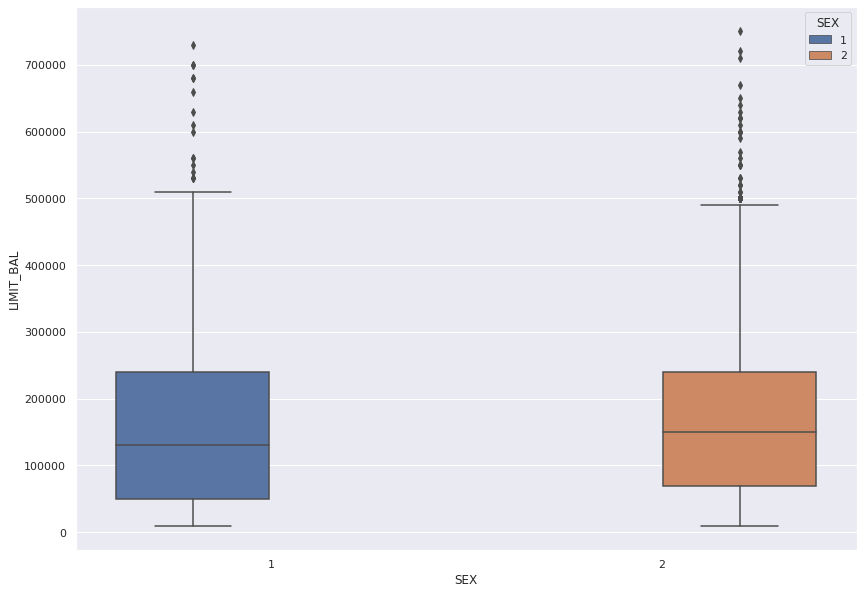

In [ ]:
sns.boxplot(x ='SEX', y ='LIMIT_BAL', data = sample_data, hue ='SEX')

From this box plot we can say that in both male and female some people(outliers) having higher credit limit between 500000 to 800000. 

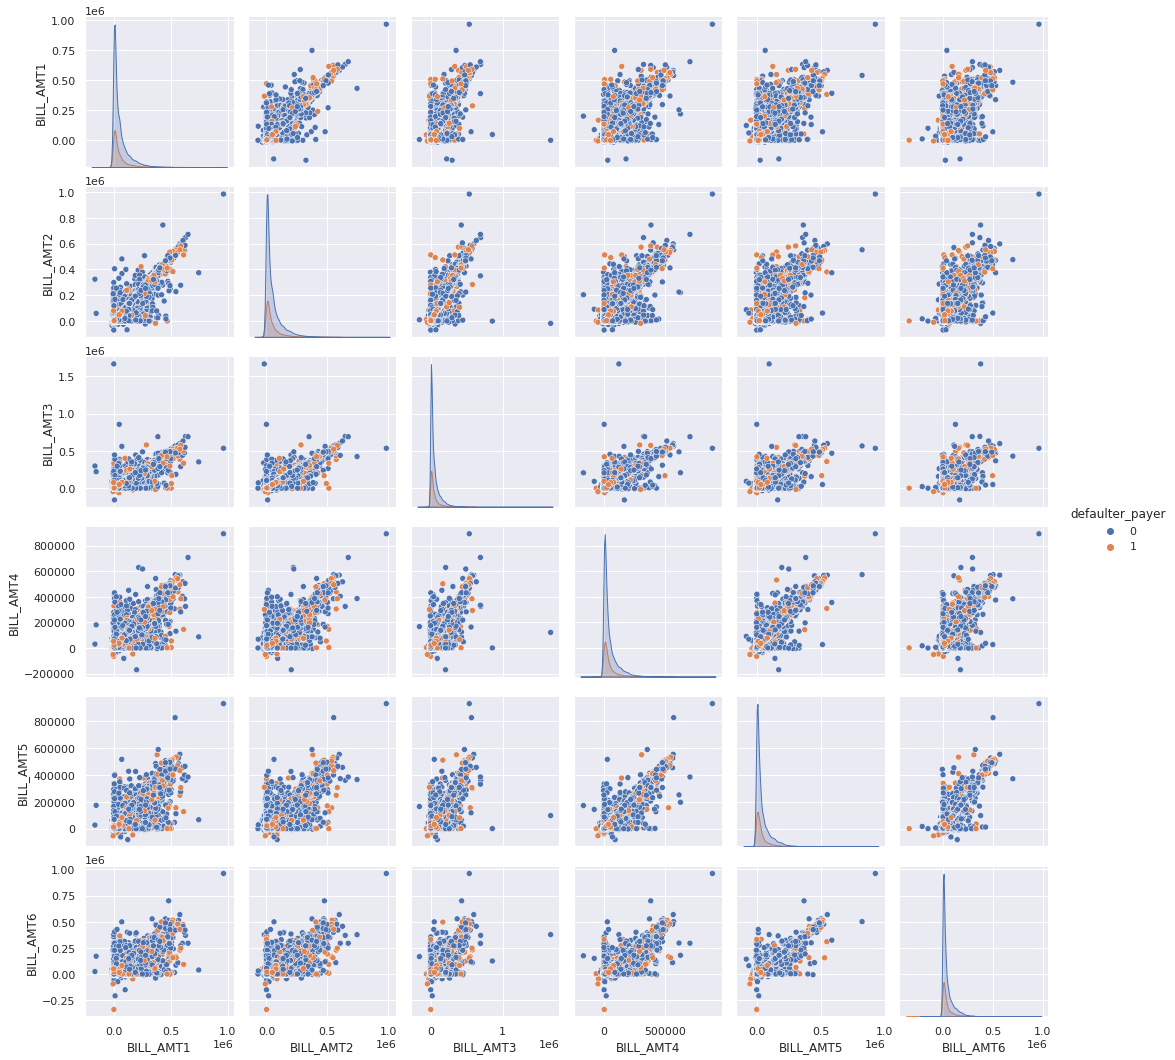

In [ ]:
sns.pairplot(dataset, vars=sample_data.columns[11:17], kind='scatter',hue= 'defaulter_payer')

The distribution of the bill amounts are right skewed. For models requirement we have to do normalisation of data , a log transformation or standardisation can be used.

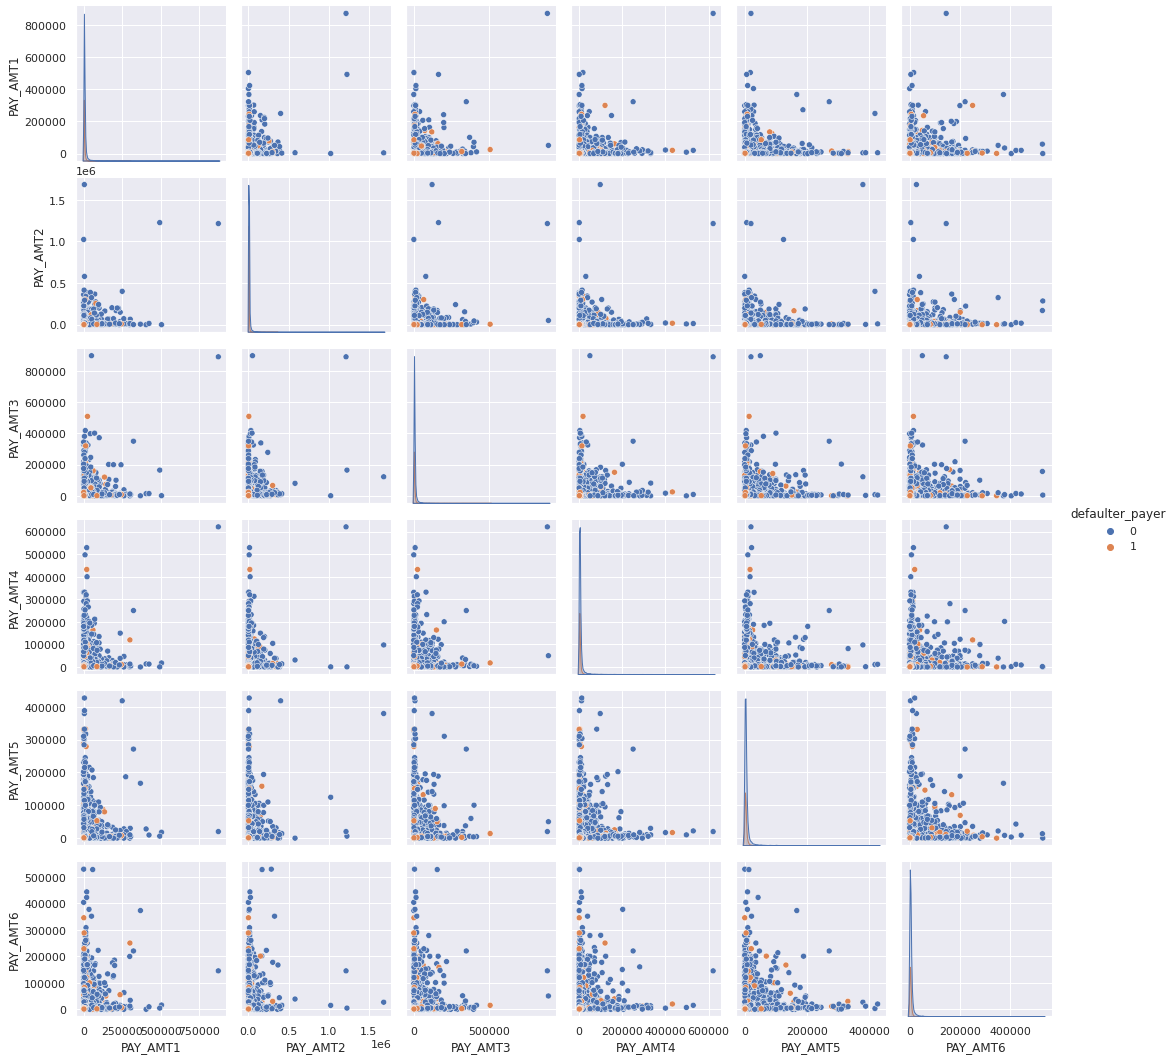

In [ ]:
sns.pairplot(dataset, vars=sample_data.columns[17:23], kind='scatter',hue= 'defaulter_payer')

The distribution of the pay amounts are right skewed. For models requirement we have to do normalisation of data , a log transformation or standardisation can be used.

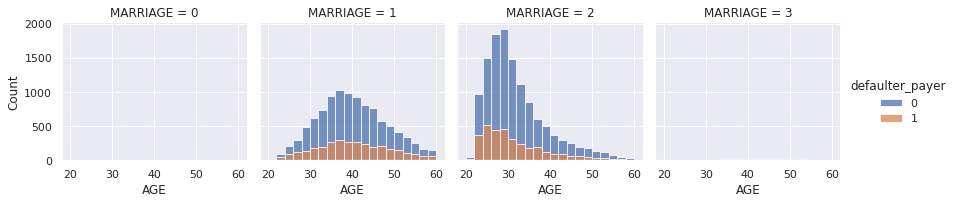

In [ ]:
g = sns.FacetGrid(dataset, col="MARRIAGE", hue="defaulter_payer")
g.map_dataframe(sns.histplot, x="AGE", binwidth=2, binrange=(20, 60)).add_legend()
plt.show()

From the above FaceGrid Plot we can observe that single poeple has more number of non-defaults with respect to married people.

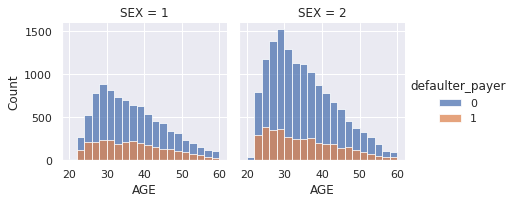

In [ ]:
g = sns.FacetGrid(dataset, col="SEX", hue="defaulter_payer")
g.map_dataframe(sns.histplot, x="AGE", binwidth=2, binrange=(20, 60)).add_legend()
plt.show()

From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of Female age between 30-40year

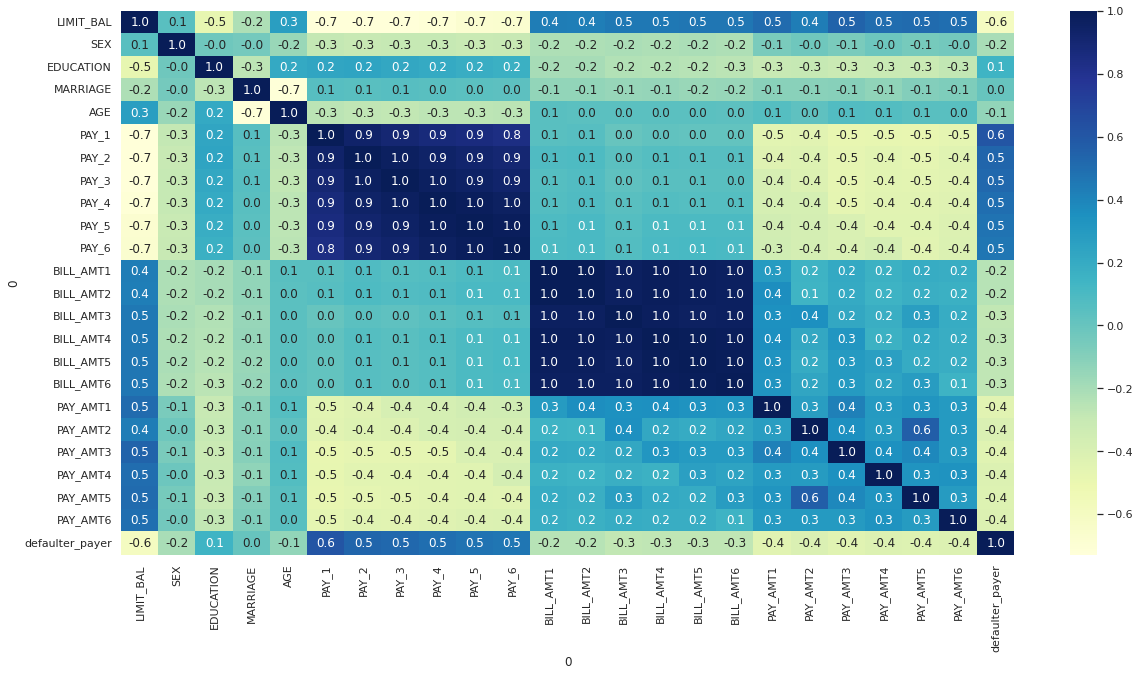

In [ ]:
correlation = sample_data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(correlation.corr(), cmap="YlGnBu", annot=True, fmt=".1f")

From the above collinearity, we can observe that PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.

**DATA CLEANING**

In [ ]:
sample_data['EDUCATION'].value_counts()

2    2812
1    2132
3     958
5      48
4      33
6      14
0       3
Name: EDUCATION, dtype: int64

EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.

In [ ]:
sample_data.loc[(sample_data.EDUCATION == 5) | (sample_data.EDUCATION == 6) | (sample_data.EDUCATION == 0), 'EDUCATION'] = 4
sample_data.EDUCATION.value_counts()

2    2812
1    2132
3     958
4      98
Name: EDUCATION, dtype: int64

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

In [ ]:
sample_data.loc[sample_data.MARRIAGE == 0, 'MARRIAGE'] = 3
sample_data.MARRIAGE.value_counts()

2    3178
1    2742
3      80
Name: MARRIAGE, dtype: int64

MARRIAGE has a label 0 that is undocumented.

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

In [ ]:
sample_data['PAY_2'].value_counts()

 0    3196
-1    1208
-2     745
 2     738
 3      80
 4      17
 5       8
 1       6
 8       1
 6       1
Name: PAY_2, dtype: int64

In [ ]:
sample_data.loc[(sample_data.PAY_1 == -1) | (sample_data.PAY_1==-2),'PAY_1']=0
sample_data.loc[(sample_data.PAY_2 == -1) | (sample_data.PAY_2==-2),'PAY_2']=0
sample_data.loc[(sample_data.PAY_3 == -1) | (sample_data.PAY_3==-2),'PAY_3']=0
sample_data.loc[(sample_data.PAY_4 == -1) | (sample_data.PAY_4==-2),'PAY_4']=0
sample_data.loc[(sample_data.PAY_5 == -1) | (sample_data.PAY_5==-2),'PAY_5']=0
sample_data.loc[(sample_data.PAY_6 == -1) | (sample_data.PAY_6==-2),'PAY_6']=0
sample_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter_payer
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,0,0,0,0,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,0,0,0,0,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26330,350000.0,2,2,2,34,1,0,2,0,0,...,15722.0,2003.0,7264.0,650.0,0.0,15788.0,10.0,7299.0,13980.0,0
29694,380000.0,1,2,2,30,0,0,0,0,0,...,95527.0,91541.0,92808.0,3000.0,90527.0,5000.0,3000.0,4000.0,3000.0,0
16606,50000.0,1,2,2,31,0,0,0,0,0,...,7629.0,6354.0,4655.0,2955.0,2500.0,2500.0,2526.0,2000.0,1500.0,0


PAY_1 to PAY_6 has a label 0 and -2 that is undocumented but 0 has maximum frequency. So as -1 declared as properly payment at time. We merge -1 and -2 to 0 as properly payment at time.

**Feature Scaling**

It refers to putting the values in the same range or same scale so that no variable is dominated by the other.

It is mostly used in the categorical data where the categories are assigned simple integers such as 0,1,2… which might represent different categories.

Here, we are using Z score normalisation.It calculates the z-score of each value and replaces the value with the calculated Z-score.

In [ ]:
features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

sample_data[features] = sample_data[features].apply(lambda x : (x-np.mean(x))/np.std(x))  # here we are using Z score normalisation

In [ ]:
sample_data.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter_payer
ID,,,,,,,,,,,,,,,,,,,,,
10748,1.076088,1,3,1,-0.374823,0,0,0,0,0,...,0.606714,0.263605,-0.425228,0.151204,-0.005343,-0.093624,-0.136327,-0.255672,-0.181505,0
12574,-1.211071,2,3,1,1.460339,0,0,0,0,2,...,-0.646118,-0.650812,-0.645261,-0.353617,-0.221493,-0.156760,-0.312663,-0.306803,-0.277067,1
29677,-0.906116,1,2,1,-0.806626,0,0,0,0,0,...,0.024899,-0.648197,0.070673,-0.353617,1.444918,-0.190590,-0.236251,2.431320,-0.210842,0
8857,-0.677400,2,3,1,1.784191,2,2,3,3,3,...,-0.054302,-0.026391,0.014471,-0.128441,-0.163853,-0.222913,-0.312663,-0.218168,-0.200617,1
21099,0.771133,1,1,2,-0.158921,1,2,0,0,2,...,-0.331588,-0.419113,-0.372352,-0.353617,-0.077393,-0.201365,-0.312663,-0.193165,-0.181505,0
17459,-0.219969,2,3,1,-0.590724,0,0,0,0,2,...,0.574198,0.380181,0.351030,-0.067582,-0.059200,0.386146,-0.312663,-0.180039,-0.167170,0
1477,0.237463,1,2,2,-1.022527,0,0,0,0,0,...,-0.429032,-0.465559,-0.550983,0.434927,-0.081572,-0.039215,-0.271518,-0.295677,-0.195218,0
5121,-0.143730,1,2,2,0.164931,0,0,0,0,0,...,0.312291,0.328569,0.320086,-0.201471,-0.131430,-0.105475,-0.183350,-0.193165,-0.181505,0
18339,-1.134832,2,2,2,-1.454330,0,0,0,0,0,...,-0.373136,-0.349241,-0.328073,-0.171042,-0.113382,-0.147494,-0.195106,-0.255547,-0.239654,0


**Applying train test split**

In [ ]:
X = sample_data.iloc[:,:-1].values
y = sample_data.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [ ]:
X_train.shape

(4200, 23)

In [ ]:
X_test.shape

(1800, 23)

**Applying Machine Learning Algorithm for Classification Problem**







**1.   Logistic regression**



In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid Function is used.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

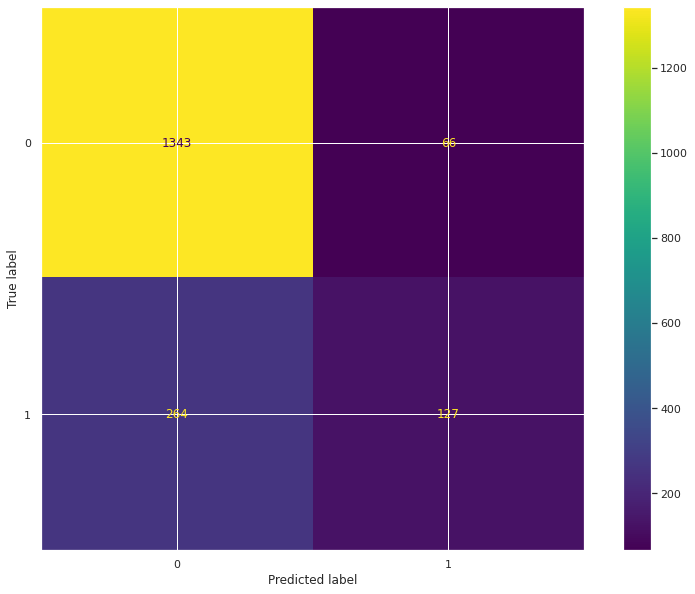

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

Inference for confusion matrix for logistic regression

In [ ]:
cm

array([[1343,   66],
       [ 264,  127]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)

scores_1 = pd.DataFrame([['Logistic Regression', accuracy, precision, recall, f1, roc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

# final_scores = final_scores.append(scores, ignore_index = True)
# final_scores
scores_1

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.816667,0.658031,0.324808,0.434932,0.638983


From the above confusion matrix, we can conclude our accuracy, precision, recall, f1 score, and ROC.
* Accuracy-0.81
* Precision-0.658031
* recall-0.324808
* f1 score-0.434932
* ROC-0.638983


**Grid Search on Logistic Regression**

In [ ]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['none']}

In [ ]:
grid_search_log = GridSearchCV(estimator=lr,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)

In [ ]:
grid_search_log.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['none']},
             scoring='accuracy')

In [ ]:
best_accuracy = grid_search_log.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.8142857142857143


In [ ]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 0.001, 'class_weight': None, 'penalty': 'none'}

In [ ]:
y_pred_logistic = grid_search_log.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred_logistic)
prec = precision_score(y_test, y_pred_logistic)
rec = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)
roc = roc_auc_score(y_test, y_pred_logistic)

In [ ]:
tuned_results =  pd.DataFrame([['Logistic Regression Tuned', acc, prec, rec, f1, roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
tuned_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.816667,0.658031,0.324808,0.434932,0.638983


Grid SearchCV on Logistic Regression
 * Accuracy-0.816667
 * Precision-0.658031
 * Recall-0.324808
 * F1 Score-0.434932
 * ROC-0.638983


**Decision tree**

The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

Advantages of Decision Trees

Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

Disadvantages of Decision Trees

Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_tree = DecisionTreeClassifier()

In [ ]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_2 = dec_tree.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

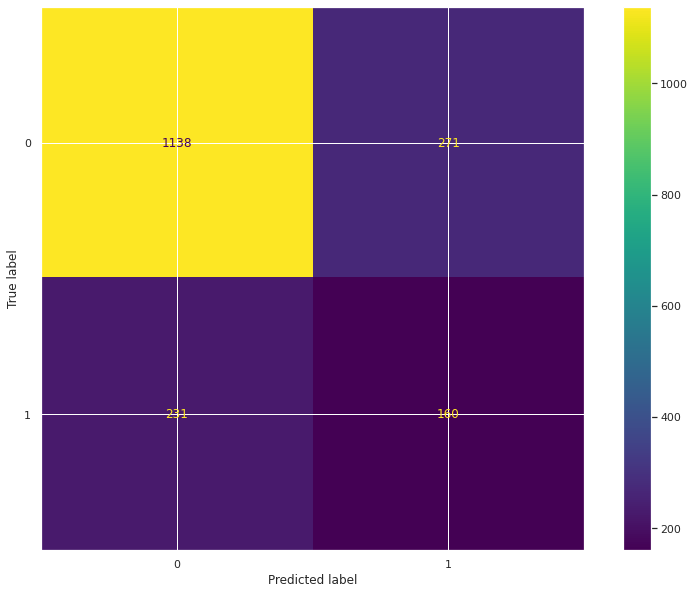

In [ ]:
cm = confusion_matrix(y_test, y_pred_2)
cm_display = ConfusionMatrixDisplay(cm).plot()

Inference for confusion matrix for Decision tree

In [ ]:
cm

array([[1138,  271],
       [ 231,  160]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred_2)
precision = precision_score(y_test, y_pred_2)
recall = recall_score(y_test, y_pred_2)
f1 = f1_score(y_test, y_pred_2)
roc_score = roc_auc_score(y_test, y_pred_2)

scores_2 = pd.DataFrame([['Decision Tree Classifier', accuracy, precision ,recall ,f1 ,roc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
scores_2

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.721111,0.37123,0.409207,0.389294,0.608436


From the above, confusion matrix, we can conclude our accuracy, precision, recall, f1 score, and ROC.

Accuracy-0.711111

Precision-0.359477

recall-0.421995

f1 score-0.388235

ROC-0.606668

Grid Search on Decision tree

In [ ]:
#dct_param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=dec_tree,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(X_train,y_train)

In [ ]:
best_accuracy_2 = grid_search_dt.best_score_
best_accuracy_2

0.8183333333333334

In [ ]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
y_pred_dt = grid_search_dt.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt)
rec = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
roc = roc_auc_score(y_test, y_pred_dt)

In [ ]:
tuned_results_2 =  pd.DataFrame([['Decision tree tuned', acc, prec, rec, f1, roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
tuned_results_2

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision tree tuned,0.815556,0.68323,0.28133,0.398551,0.622567


Grid SearchCV on decision tree

*  Accuracy-0.815556
*  Precision-0.68323
*  Recall-0.28133
*  F1 Score-0.398551
*  ROC-0.622567



1.   Random Forest




Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_3 = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_3)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

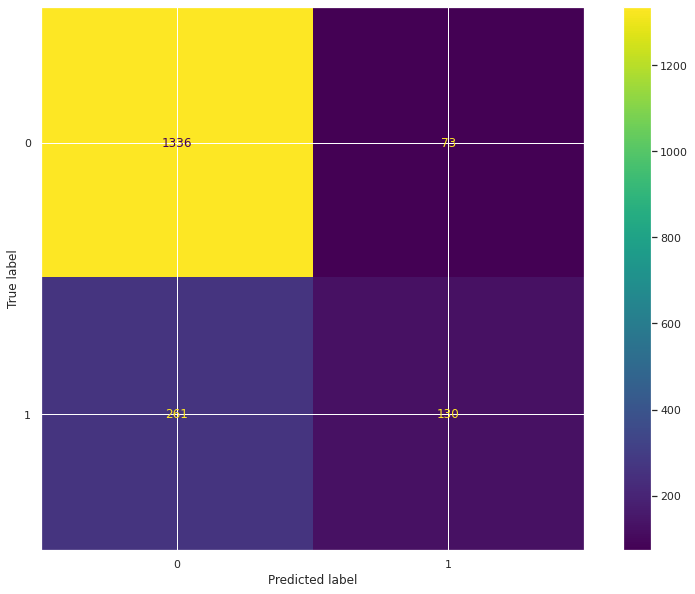

In [ ]:
cm = confusion_matrix(y_test, y_pred_3)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
cm

array([[1336,   73],
       [ 261,  130]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred_3)
precision = precision_score(y_test, y_pred_3)
recall = recall_score(y_test, y_pred_3)
f1 = f1_score(y_test, y_pred_3)
roc_score = roc_auc_score(y_test, y_pred_3)

scores_3 = pd.DataFrame([['Random tree Classifier', accuracy, precision, recall, f1, roc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

scores_3

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.814444,0.640394,0.332481,0.43771,0.640336


From the above confusion matrix, we can conclude our accuracy, precision, recall, f1 score, and ROC.
*  Accuracy-0.814444
*  Precision-0.640394
*  Recall-0.332481
*  f1 score-0.43771
*  ROC-0.640336

Grid search cv on random forest

In [ ]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [ ]:
best_accuracy_3 = grid_search_rf.best_score_
best_accuracy_3

0.812857142857143

In [ ]:
best_parameters_3 = grid_search_rf.best_params_
best_parameters_3

{'class_weight': None, 'criterion': 'entropy', 'n_estimators': 200}

In [ ]:
y_pred_rf = grid_search_rf.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)


tuned_results_3=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

In [ ]:
tuned_results_3

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Tuned,0.813333,0.636816,0.327366,0.432432,0.637778


 
Grid search cv on random forest
*  Accuracy-0.813333
*  Precision-0.636816	
*  Recall-0.327366
*  f1 score-0.432432
*  ROC-0.637778

**4. Stochastic Gradient Descent**

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd = SGDClassifier(loss='log', penalty='l1',random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', penalty='l1', random_state=1)

In [ ]:
y_pred_4 = sgd.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_4)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

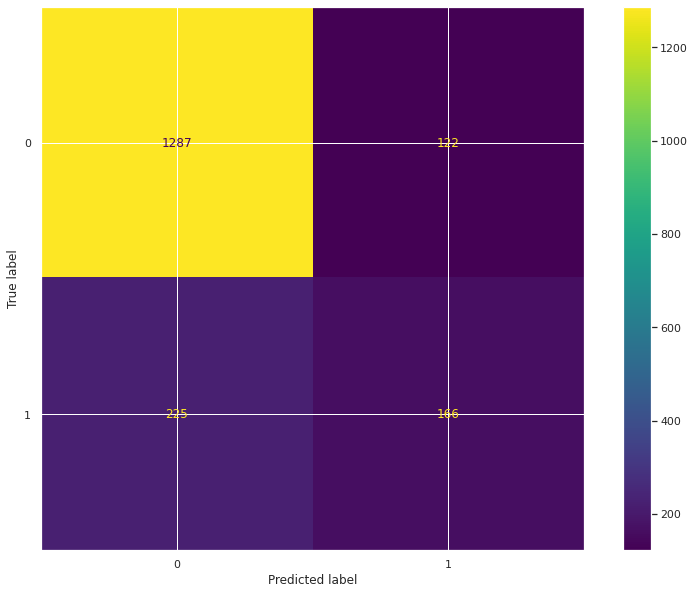

In [ ]:
cm = confusion_matrix(y_test, y_pred_4)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
cm

array([[1287,  122],
       [ 225,  166]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred_4)
precision = precision_score(y_test, y_pred_4)
recall = recall_score(y_test, y_pred_4)
f1 = f1_score(y_test, y_pred_4)
roc_score = roc_auc_score(y_test, y_pred_4)

scores_4 = pd.DataFrame([['Stochastic Gradient Descent', accuracy, precision, recall, f1, roc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

scores_4

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent,0.807222,0.576389,0.424552,0.488954,0.668983


From the above confusion matrix, we can conclude our accuracy, precision, recall, f1 score, and ROC.
*  Accuracy-0.807222
*  Precision-0.576389	
*  Recall-0.424552
*  f1 score-0.488954
*  ROC-0.668983

**Grid search CV on Stochastic Gradient Descent**

In [ ]:
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}
grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_sgd = grid_search_sgd.fit(X_train,y_train)

In [ ]:
best_accuracy_4 = grid_search_sgd.best_score_
best_accuracy_4

0.8142857142857143

In [ ]:
best_parameters_4 = grid_search_sgd.best_params_
best_parameters_4

{'alpha': 0.01, 'class_weight': None}

In [ ]:
y_pred_sgd = grid_search_sgd.predict(X_test)

In [ ]:
sgd_prob = grid_search_sgd.predict_proba(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_sgd)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
rec = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)

In [ ]:
tuned_results_4 =  pd.DataFrame([['Stochastic Gradient Descent Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

tuned_results_4

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent Tuned,0.817778,0.674033,0.31202,0.426573,0.635073


Grid search CV on Stochastic Gradient Descent
*  Accuracy-0.817778
*  Precision-0.674033	
*  Recall-0.31202
*  f1 score-0.426573
*  ROC-0.635073

**5. K-Nearest Neighbour**

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Create a for loop that trains various KNN models with different k values, then track the error_rate for each of these models with a list. At last select the best k value.


In [ ]:
error_rate = []
# Will take some time
for i in range(1,30):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

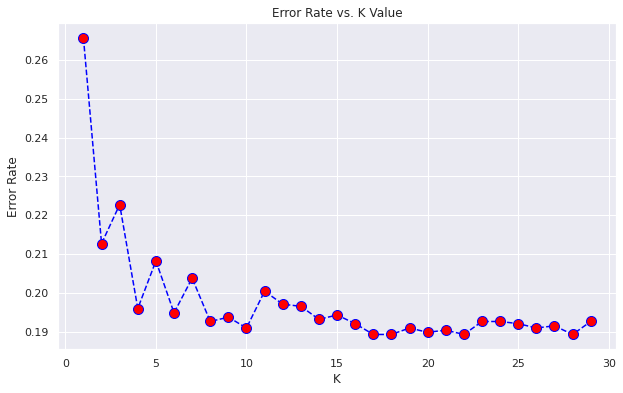

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=24)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [ ]:
y_pred_5 = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_5)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

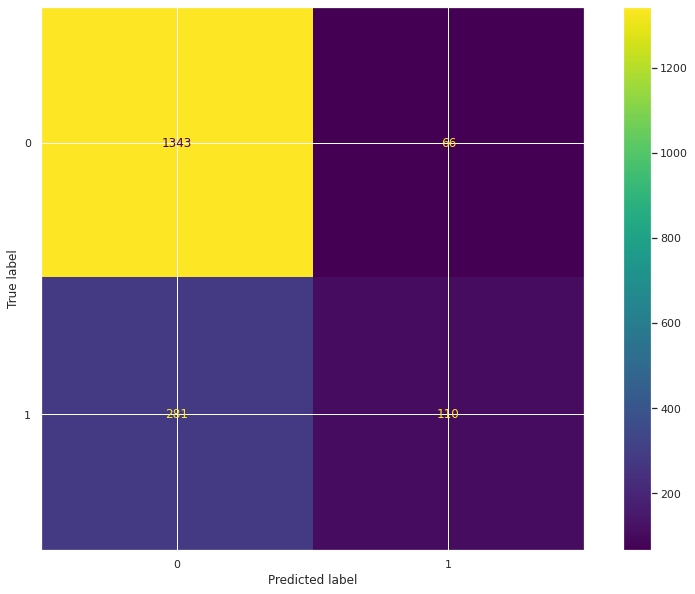

In [ ]:
cm = confusion_matrix(y_test, y_pred_5)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
cm

array([[1343,   66],
       [ 281,  110]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred_5)
precision = precision_score(y_test, y_pred_5)
recall = recall_score(y_test, y_pred_5)
f1 = f1_score(y_test, y_pred_5)
roc_score=roc_auc_score(y_test, y_pred_5)

In [ ]:
scores_5 = pd.DataFrame([['K-Nearest Neighbour', accuracy,precision,recall, f1,roc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

scores_5

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.807222,0.625,0.28133,0.388007,0.617244


From the above confusion matrix, we can conclude our accuracy, precision, recall, f1 score, and ROC.
*  Accuracy-0.807222	

*  Precision-0.625
 
*  Recall-0.28133

*  f1 score-0.388007
 
*  ROC-0.617244


**Grid search CV on KNN**

In [ ]:
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}

In [ ]:
grid_search = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

In [ ]:
best_accuracy_5 = grid_search.best_score_
best_accuracy_5

0.8097619047619048

In [ ]:
best_parameters_5 = grid_search.best_params_
best_parameters_5

{'leaf_size': 1, 'n_neighbors': 23, 'weights': 'uniform'}

In [ ]:
y_pred_KNN = grid_search.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)

In [ ]:
tuned_result_5 =  pd.DataFrame([['KNN Model Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

tuned_result_5

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN Model Tuned,0.807222,0.614583,0.30179,0.404803,0.624635


Grid search CV on KNN
*  Accuracy-0.807222	
  
*  Precision-0.614583
  
*  Recall-0.30179	
  
*  f1 score-0.404803	
  
*  ROC-0.624635


**6. Support Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred_6 = svc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_6)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

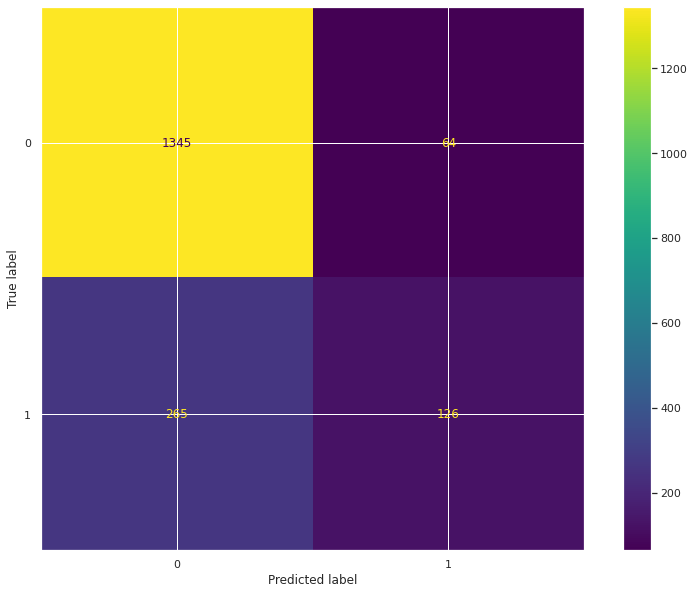

In [ ]:
cm = confusion_matrix(y_test, y_pred_6)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
cm

array([[1345,   64],
       [ 265,  126]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred_6)
precision = precision_score(y_test, y_pred_6)
recall = recall_score(y_test, y_pred_6)
f1 = f1_score(y_test, y_pred_6)
roc_score = roc_auc_score(y_test, y_pred_6)

scores_6 = pd.DataFrame([['Random tree Classifier', accuracy, precision, recall, f1, roc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

scores_6

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.817222,0.663158,0.322251,0.433735,0.638414


From the above confusion matrix, we can conclude our accuracy, precision, recall, f1 score, and ROC.
*  Accuracy-0.817222	

*  Precision-0.66315
 
*  Recall-0.32225

*  f1 score-0.43373
 
*  ROC-0.638414

**Grid search CV on SVM**

In [ ]:
# svc_params = [{'C':[0.001,0.01,0.1,1,10,1000],'kernel':['linear']},
#                {'C':[0.001,0.01,0.1,1,10,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.0001]}]

In [ ]:
# grid_search_svc = GridSearchCV(estimator=svc,param_grid=svc_params,scoring='accuracy',cv=5,n_jobs=-1)
# grid_search_svc = grid_search_svc.fit(X_train,y_train)

In [ ]:
# best_accuracy_6 = grid_search_svc.best_score_
# best_accuracy_6

In [ ]:
# best_parameters_6 = grid_search_svc.best_params_
# best_parameters_6

Here we got c as 1000, gamma as 0.0001 and kernal as rbf as best parameters.

In [ ]:
# y_pred_svc =grid_search_svc.predict(X_test)

In [ ]:
# roc=roc_auc_score(y_test, y_pred_svc)
# acc = accuracy_score(y_test, y_pred_svc)
# prec = precision_score(y_test, y_pred_svc)
# rec = recall_score(y_test, y_pred_svc)
# f1 = f1_score(y_test, y_pred_svc)

In [ ]:
# tuned_results_6 =  pd.DataFrame([['SVC MODEL TUNED', acc,prec,rec, f1,roc]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

# tuned_results_6

Above code of gridsearch cv of SVM takes huge amount of time to run thats why we commented this out for the reduction of time complexity. But after runing this grid search we have noted all the results i.e accuracy, precision, recall, f1 score, ROC.

Grid search CV on SVM
*  Accuracy-0.823333	
  
*  Precision-0.685279
  
*  Recall-0.345269
  
*  f1 score-0.459184	
  
*  ROC-0.650633

**Conclusion**

1)Using a Support Vector Machine classifier, we can predict with 82.33% accuracy, whether a customer is likely to default next month.


2)Using a Logistic Regression classifier, we can predict with 81.6% accuracy, whether a customer is likely to default next month.

3)Using a Decision Tree classifier, we can predict with 81.5% accuracy, whether a customer is likely to default next month.

4)Using a Random Forest classifier, we can predict with 81.33% accuracy, whether a customer is likely to default next month.

5)Using a Stochastic Gradient Descent classifier, we can predict with 81.7% accuracy, whether a customer is likely to default next month.

6)Using a K-Nearest Neighbour classifier, we can predict with 80.7% accuracy, whether a customer is likely to default next month.



The strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).


We found that we are getting best results from SVM and then Stochastic Gradient Descent and then Logistic regression.

The credit limit is a good indicator of financial stability. Whatever mechanism the bank is currently using works well and some of the features that go into choosing the credit line can be used directly in the model for default prediction.


**Demographics:--** we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.